In [1]:
import os
os.sys.path.append("C:\\Users\mplitt\MightyMorphingPhotonRangers")
import numpy as np
import matplotlib.pyplot as plt

import utilities as u
import preprocessing as pp
import behavior as b
import SimilarityMatrixAnalysis as sm
import scipy as sp
import PlaceCellAnalysis as pc
from SplineEncodingModel.LinearRegressionSpline import EncodingModel, NBDecodingModel
from SplineEncodingModel import PopDecodingCV as pdcv
import matplotlib.gridspec as gridspec
import pickle

%load_ext autoreload
%autoreload 2

%matplotlib inline

In [8]:
df = pp.load_session_db()


df = df[df['RewardCount']>30]
# df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [9]:
mouse = '4222157.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
# df_mouse = df_mouse[df_mouse['Track'].str.match('TwoTower_noTimeout') | df_mouse['Track'].str.match('TwoTower_Timeout')]
df_mouse


,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1995,4222157.3,04_06_2019,1,TwoTower_foraging,100,1,CA1,2019-06-04,G:\My Drive\VR_Data\TwoTower\4222157.3\04_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.3\04_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.3\04_06_2...
1996,4222157.3,04_06_2019,2,TwoTower_foraging,80,0,,2019-06-04,G:\My Drive\VR_Data\TwoTower\4222157.3\04_06_2...,None,None,None
2009,4222157.3,05_06_2019,1,TwoTower_foraging,200,0,,2019-06-05,G:\My Drive\VR_Data\TwoTower\4222157.3\05_06_2...,None,None,None
2026,4222157.3,06_06_2019,1,TwoTower_foraging,50,0,,2019-06-06,G:\My Drive\VR_Data\TwoTower\4222157.3\06_06_2...,None,None,None
2027,4222157.3,06_06_2019,2,TwoTower_foraging,100,1,CA1,2019-06-06,G:\My Drive\VR_Data\TwoTower\4222157.3\06_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.3\06_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.3\06_06_2...
2028,4222157.3,06_06_2019,3,TwoTower_foraging,50,0,,2019-06-06,G:\My Drive\VR_Data\TwoTower\4222157.3\06_06_2...,None,None,None
2036,4222157.3,07_06_2019,1,TwoTower_foraging,225,0,,2019-06-07,G:\My Drive\VR_Data\TwoTower\4222157.3\07_06_2...,None,None,None
2048,4222157.3,08_06_2019,1,TwoTower_foraging,50,0,,2019-06-08,G:\My Drive\VR_Data\TwoTower\4222157.3\08_06_2...,None,None,None
2049,4222157.3,08_06_2019,2,TwoTower_foraging,80,1,CA1,2019-06-08,G:\My Drive\VR_Data\TwoTower\4222157.3\08_06_2...,None,G:\My Drive\2P_Data\TwoTower\4222157.3\08_06_2...,G:\My Drive\2P_Data\TwoTower\4222157.3\08_06_2...
2050,4222157.3,08_06_2019,3,TwoTower_foraging,60,0,CA1,2019-06-08,G:\My Drive\VR_Data\TwoTower\4222157.3\08_06_2...,None,None,None


In [10]:
sess = df_mouse.iloc[-1]

(120, 45) (120,)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

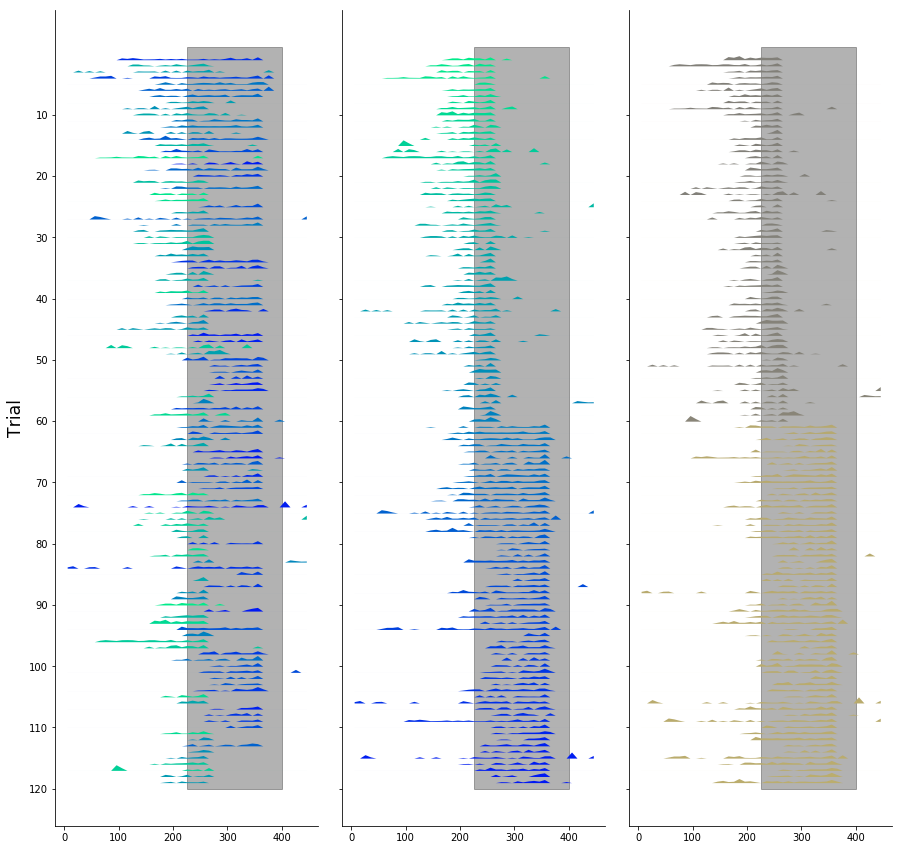

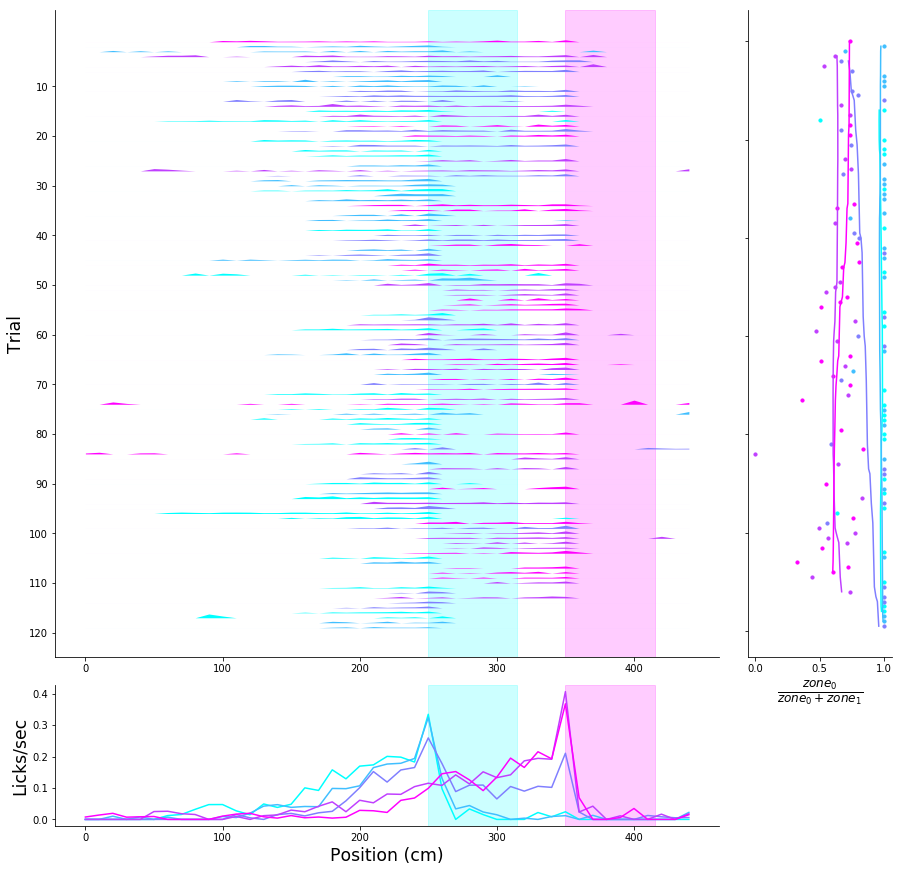

In [11]:
VRDat = pp.behavior_dataframe(sess['data file'])
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
lick_trial_mat,occ,edges,centers= u.make_pos_bin_trial_matrices(VRDat['lick']._values,
                                                            VRDat['pos']._values,
                                                            VRDat['tstart']._values,
                                                            VRDat['teleport']._values,
                                                            bin_size=10)
lick_trial_mat = lick_trial_mat[:150,:]
print(lick_trial_mat.shape,trial_info['morphs'].shape)
lick_morph_dict = u.trial_type_dict(lick_trial_mat,trial_info['morphs'][:150])
speed_trial_mat = u.make_pos_bin_trial_matrices(VRDat['speed']._values,
                                                        VRDat['pos']._values,
                                                        VRDat['tstart']._values,
                                                        VRDat['teleport']._values,
                                                        mat_only=True,bin_size=10)

effMorph = (trial_info['morphs']+trial_info['wallJitter']+trial_info['bckgndJitter']+.25)/1.5
reward_pos = trial_info['reward_pos']
reward_pos[np.isnan(reward_pos)]= 480.
f_lick, axarr_lick = b.behavior_raster_foraging(lick_trial_mat/np.nanmax(lick_trial_mat.ravel()),
                                                centers,effMorph[:150],reward_pos[:150]/480.,smooth=False)


f_lick, (ax_lick, meanlr_ax, lickrat_ax) = b.lick_plot_task(lick_morph_dict,edges,smooth=False)